### Testing selection procedure using HIV dataset

#### Import, data preprocessing and model training

In [5]:
from DeepPurpose import utils, dataset, CompoundPred
import warnings
warnings.filterwarnings("ignore")

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
X_drugs, y, drugs_index = dataset.load_HIV(path = './data')
drug_encoding = 'Morgan'

Dataset already downloaded in the local system...


In [77]:
import numpy as np
import os
import sys
import pandas as pd

In [78]:
n = len(y)
reind = np.random.permutation(n)
X_drugs_train = X_drugs[reind[0:int(n*0.4+1)]]
y_train = y[reind[0:int(n*0.4+1)]]
X_drugs_other = X_drugs[reind[int(1+n*0.4):n]]
y_other = y[reind[int(1+n*0.4):n]]

In [80]:
ttrain, tval, ttest = utils.data_process(X_drug = X_drugs_train, y = y_train, 
                                         drug_encoding = drug_encoding,
                                         split_method='random', frac=[0.7, 0.1, 0.2],
                                         random_seed = 42)

Drug Property Prediction Mode...
in total: 16451 drugs
encoding drug...
unique drugs: 16451


[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerator
[14:40:08] DEPRECATION WARNING: please use MorganGenerat

Done.


[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerator
[14:40:11] DEPRECATION WARNING: please use MorganGenerat

In [81]:
dother = utils.data_process(X_drug = X_drugs_other, y = y_other, 
                                     drug_encoding = drug_encoding,
                                     split_method= 'no_split',
                                     random_seed = 42)

Drug Property Prediction Mode...
in total: 24676 drugs
encoding drug...
unique drugs: 24676


[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerator
[14:40:19] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data


[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerator
[14:40:24] DEPRECATION WARNING: please use MorganGenerat

In [82]:
# USING CUSTOM PREDICTOR
ttrain_label = ttrain.Label.to_numpy()
# use np.stack to transform a 1d array of np arrays to a 2d np array
ttrain_predictor = np.stack(ttrain['drug_encoding'].to_numpy()) 
dother_predictor = np.stack(dother['drug_encoding'].to_numpy())

model = LinearRegression()
model.fit(ttrain_predictor, ttrain_label)
all_pred = model.predict(dother_predictor)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68897. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.73113 , AUPRC: 0.27094 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.14617. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.75720 , AUPRC: 0.34898 , F1: 0.34042
Training at Epoch 3 iteration 0 with loss 0.05871. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.80324 , AUPRC: 0.46003 , F1: 0.42424
--- Go for Testing ---
Testing AUROC: 0.7880622021813324 , AUPRC: 0.3931773271316014 , F1: 0.4161849710982659
--- Training Finished ---


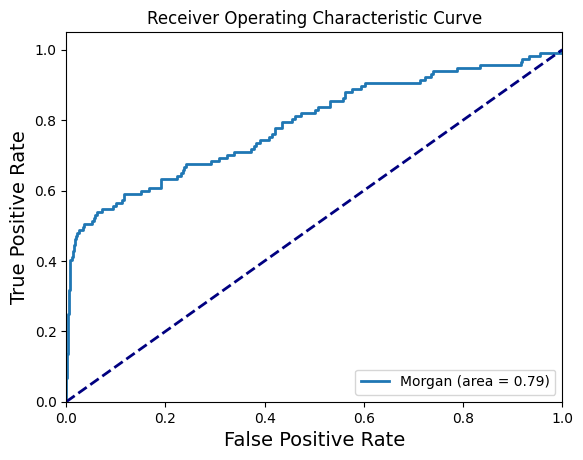

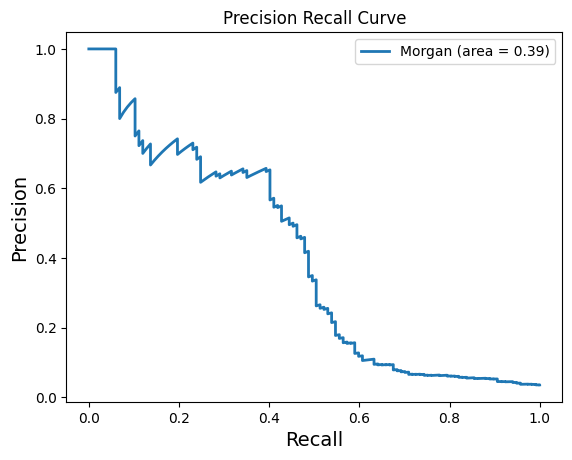

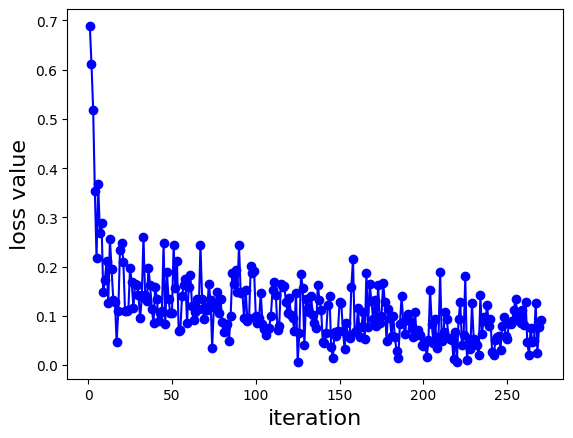

In [59]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                       cls_hidden_dims = [1024, 1024, 512], 
                       train_epoch = 3, 
                       LR = 0.001, 
                       batch_size = 128,
                       hidden_dim_drug = 128
                      )
model = CompoundPred.model_initialize(**config)
model.train(ttrain, tval, ttest)

all_pred = np.array(model.predict(dother))
train_pred = np.array(model.predict(ttrain))

#### Computing calibration set split (with covariate shift) and conformity scores

In [88]:
calib_msk = np.random.rand(len(dother)) < 0.5

dcalib = dother[calib_msk]
dtest = dother[~calib_msk]

hat_mu_calib = all_pred[calib_msk]
hat_mu_test = all_pred[~calib_msk]

y_calib = np.array(dcalib["Label"])
y_test = np.array(dtest["Label"])

In [89]:
c = 0
 
calib_scores_res = y_calib - hat_mu_calib
calib_scores_sub = - hat_mu_calib 
calib_scores_clip = 100 * (y_calib > c) + c * (y_calib <= c) - hat_mu_calib
 
test_scores = c - hat_mu_test

#### Calibration

In [90]:
q = 0.1 # nominal level

In [91]:
def conformal_select(calib_scores, test_scores, q = 0.1):
    ntest = len(test_scores)
    ncalib = len(calib_scores)
    pvals = np.zeros(ntest)
    
    for j in range(ntest):
        pvals[j] = (np.sum(calib_scores < test_scores[j]) + np.random.uniform(size=1)[0] * (np.sum(calib_scores == test_scores[j]) + 1)) / (ncalib+1)
         
    
    # BH(q) 
    df_test = pd.DataFrame({"id": range(ntest), "pval": pvals, "scores": test_scores}).sort_values(by='pval')
    
    df_test['threshold'] = q * np.linspace(1, ntest, num=ntest) / ntest 
    idx_smaller = [j for j in range(ntest) if df_test.iloc[j,1] <= df_test.iloc[j,3]]
     
    if len(idx_smaller) == 0:
        return np.array([]), pvals
    else:
        idx_sel = np.array(df_test.index[range(np.max(idx_smaller))])
        s_th = df_test.iloc[idx_smaller, 3]
        return idx_sel, pvals

In [92]:
def eval_sel(sel_idx, ys, cs):
    if len(sel_idx) == 0:
        fdp = 0
        power = 0
    else:
        fdp = np.sum(ys[sel_idx] <= cs[sel_idx]) / len(sel_idx)
        power = np.sum(ys[sel_idx] > cs[sel_idx]) / sum(ys > cs) 
    return fdp, power

In [109]:
BH_res, _ = conformal_select(calib_scores_res, test_scores, q)  
BH_sub, _ = conformal_select(calib_scores_sub[y_calib <= c], test_scores, q) 
BH_clip, _ = conformal_select(calib_scores_clip, test_scores, q)

In [110]:
BH_res_fdp, BH_res_power = eval_sel(BH_res, y_test, np.array([c]*len(y_test)))
BH_sub_fdp, BH_sub_power = eval_sel(BH_sub, y_test, np.array([c]*len(y_test)))
BH_clip_fdp, BH_clip_power = eval_sel(BH_clip, y_test, np.array([c]*len(y_test))) 

In [111]:
print(BH_res_fdp, BH_sub_fdp, BH_clip_fdp)

0.15 0.14285714285714285 0.125


In [112]:
print(BH_res_power, BH_sub_power, BH_clip_power)

0.03711790393013101 0.039301310043668124 0.04585152838427948


#### Result

In [114]:
all_df = pd.read_csv("..\\csv-HIV\\linear\\itr=100.csv")

all_df = all_df.mean().reset_index()
all_df

# with cov shift

,index,0
0,Unnamed: 0,49.500000
1,q,0.100000
2,seed,49.500000
3,calib_size,12336.070000
4,test_size,12339.930000
5,BH_res_fdp,0.089094
6,BH_res_power,0.042546
7,BH_sub_fdp,0.087216
8,BH_sub_power,0.040768
9,BH_clip_fdp,0.091949
